In [1]:
import os
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import paths
from utils.utils import load_df, PLOTS_DIR_PATH

In [2]:
# import data
data_path = paths.DATA_DIR_PATH
design = load_df('batches_meta_data_preprocessed.csv')
rlog = load_df('rlog_transformed_data.csv')
rlog_wo_batch_effect = load_df('rlog_transformed_data_wo_batch_effect.csv')

In [3]:
def top_n_most_expressed_genes(normalized_counts: pd.DataFrame, top_n: int = 500):
    """
    Select the top N most highly expressed genes based on variance across samples.

    Args:
        normalized_counts (pd.DataFrame): DataFrame of normalized expression values (genes x samples).
        top_n (int, optional): Number of top genes to select. Defaults to 500.

    Returns:
        pd.DataFrame: Subset of the input DataFrame containing the top N most variable genes.
    """
    # Order by variance in decreasing order and select the top n (most) expressed genes
    geneVariance = rlog.var(axis=1)
    most_expressed_genes = geneVariance.sort_values(ascending=False).head(min(500, len(geneVariance))).index
    return rlog.loc[most_expressed_genes]

In [4]:
top_n_df = top_n_most_expressed_genes(rlog, top_n = 500)

In [5]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce dimensions to 2
principal_components = pca.fit_transform(top_n_df.T)
principal_df = pd.DataFrame(data = principal_components, columns = ['Principal Component 1', 'Principal Component 2'])

principal_df['batch'] = design.index
principal_df.set_index('batch', inplace=True)
principal_df['species'] = design.species
principal_df['accession'] = design.accession
principal_df

,Principal Component 1,Principal Component 2,species,accession
batch,,,,
DEC_00390_2,-43.011830,-11.976748,hypochondriacus,AM00390
DEC_00390_5,-35.329803,-13.774559,hypochondriacus,AM00390
DEC_00390_6,-27.424272,-15.395455,hypochondriacus,AM00390
DEC_00394_2,26.714163,20.072863,caudatus,AM00394
DEC_00394_3,31.822023,17.673603,caudatus,AM00394
DEC_00394_7,23.913547,22.546052,caudatus,AM00394
FEB_00390_1,-7.363900,-23.367051,hypochondriacus,AM00390
FEB_00390_2,-28.881710,-7.605308,hypochondriacus,AM00390
FEB_00585_1,61.161966,-14.654763,caudatus,AM00585


In [6]:
# The loadings are in the components_ attribute
loadings = pca.components_

# Print the loadings
print("Loadings (contribution of each gene to each component):")

# If you want to see this in a more readable format, you can use:
feature_names = rlog.index
print("\Gene contributions:")
for i, comp in enumerate(loadings):
    print(f"Principal Component {i+1} #########################")
    contributions = zip(feature_names, comp)
    # Sort by absolute value of loadings in descending order
    sorted_contributions = sorted(contributions, key=lambda x: abs(x[1]), reverse=True)
    for feature, loading in sorted_contributions:
        print(f"{feature}: {loading:.2f}")

Loadings (contribution of each gene to each component):
\Gene contributions:
Principal Component 1 #########################
AHq000002: 0.10
AHq000010: 0.09
AHq000017: 0.09
AHq000013: 0.08
AHq000020: 0.08
AHq000028: 0.08
AHq000027: 0.08
AHq000025: 0.08
AHq000008: 0.08
AHq000030: 0.08
AHq000023: 0.07
AHq000034: 0.07
AHq000045: 0.07
AHq000043: 0.07
AHq000019: 0.07
AHq000032: 0.07
AHq000038: 0.07
AHq000001: -0.07
AHq000056: 0.07
AHq000044: 0.07
AHq000026: 0.07
AHq000053: 0.07
AHq000040: 0.07
AHq000042: 0.07
AHq000050: 0.07
AHq000039: 0.07
AHq000054: -0.07
AHq000036: -0.07
AHq000067: 0.07
AHq000063: 0.07
AHq000064: 0.07
AHq000061: 0.07
AHq000057: 0.07
AHq000074: 0.07
AHq000004: -0.07
AHq000058: -0.07
AHq000080: 0.07
AHq000060: 0.07
AHq000092: 0.07
AHq000051: 0.07
AHq000076: 0.07
AHq000081: 0.07
AHq000068: -0.06
AHq000007: -0.06
AHq000048: 0.06
AHq000082: 0.06
AHq000093: 0.06
AHq000071: -0.06
AHq000094: 0.06
AHq000083: 0.06
AHq000101: 0.06
AHq000098: 0.06
AHq000066: 0.06
AHq000079: 0.06
AHq

<>:9: SyntaxWarning: invalid escape sequence '\G'
<>:9: SyntaxWarning: invalid escape sequence '\G'
/var/folders/c9/wqdv7km12lj1fc69vz1mfn_r0000gn/T/ipykernel_14113/110917830.py:9: SyntaxWarning: invalid escape sequence '\G'
  print("\Gene contributions:")


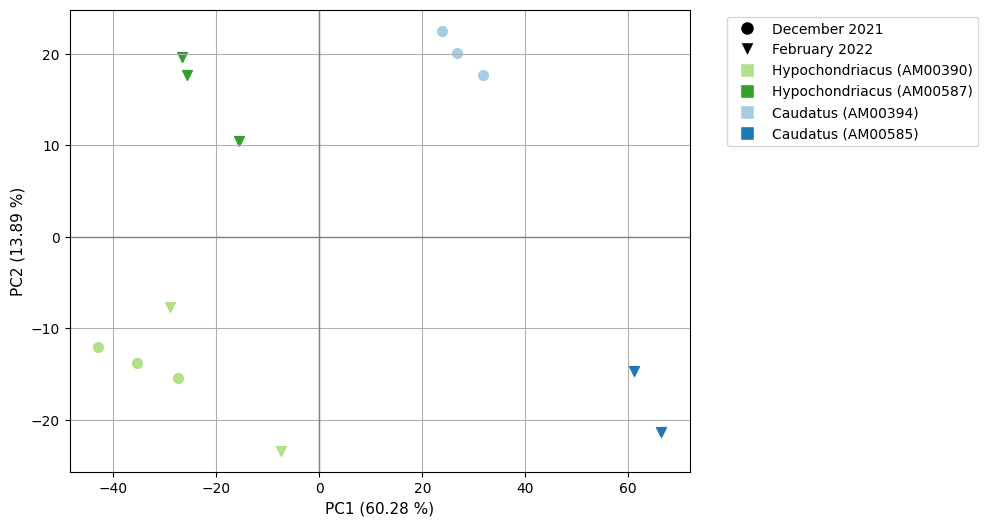

In [7]:
# Assuming principal_df is your DataFrame and pca is already fit
plt.figure(figsize=(8, 6))
colors = sns.color_palette("Paired")

for i, batch in enumerate(principal_df.index):
    subset = principal_df[principal_df.index == batch]
    if subset.iloc[0].species == 'hypochondriacus':
        if subset.iloc[0].accession == 'AM00390':
            color = colors[2]
        elif subset.iloc[0].accession == 'AM00587':
            color = colors[3]
    elif subset.iloc[0].species == 'caudatus':
        if subset.iloc[0].accession == 'AM00394':
            color = colors[0]
        elif subset.iloc[0].accession == 'AM00585':
            color = colors[1]

    if 'DEC' in batch:
        marker = 'o'
    else:
        marker = 'v'
        
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'], s=50, color=color, marker=marker, label=f"{subset.iloc[0].species} ({subset.iloc[0].accession}) {batch}")

plt.xlabel(f'PC1 ({round(pca.explained_variance_ratio_[0] * 100, 2)} %)', fontsize=11)
plt.ylabel(f'PC2 ({round(pca.explained_variance_ratio_[1] * 100, 2)} %)', fontsize=11)
#plt.title('PCA of A. hypochondriacus and A. caudatus', fontsize=18)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.grid(True)

# Custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='December 2021', markerfacecolor='black', markersize=10),
    Line2D([0], [0], marker='v', color='w', label='February 2022', markerfacecolor='black', markersize=10),
    Line2D([0], [0], marker='s', color='w', label='Hypochondriacus (AM00390)', markerfacecolor=colors[2], markersize=10),
    Line2D([0], [0], marker='s', color='w', label='Hypochondriacus (AM00587)', markerfacecolor=colors[3], markersize=10),
    Line2D([0], [0], marker='s', color='w', label='Caudatus (AM00394)', markerfacecolor=colors[0], markersize=10),
    Line2D([0], [0], marker='s', color='w', label='Caudatus (AM00585)', markerfacecolor=colors[1], markersize=10)
]

plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig(os.path.join(PLOTS_DIR_PATH,'PCA_2D_top500.pdf'), bbox_inches="tight")
plt.show()

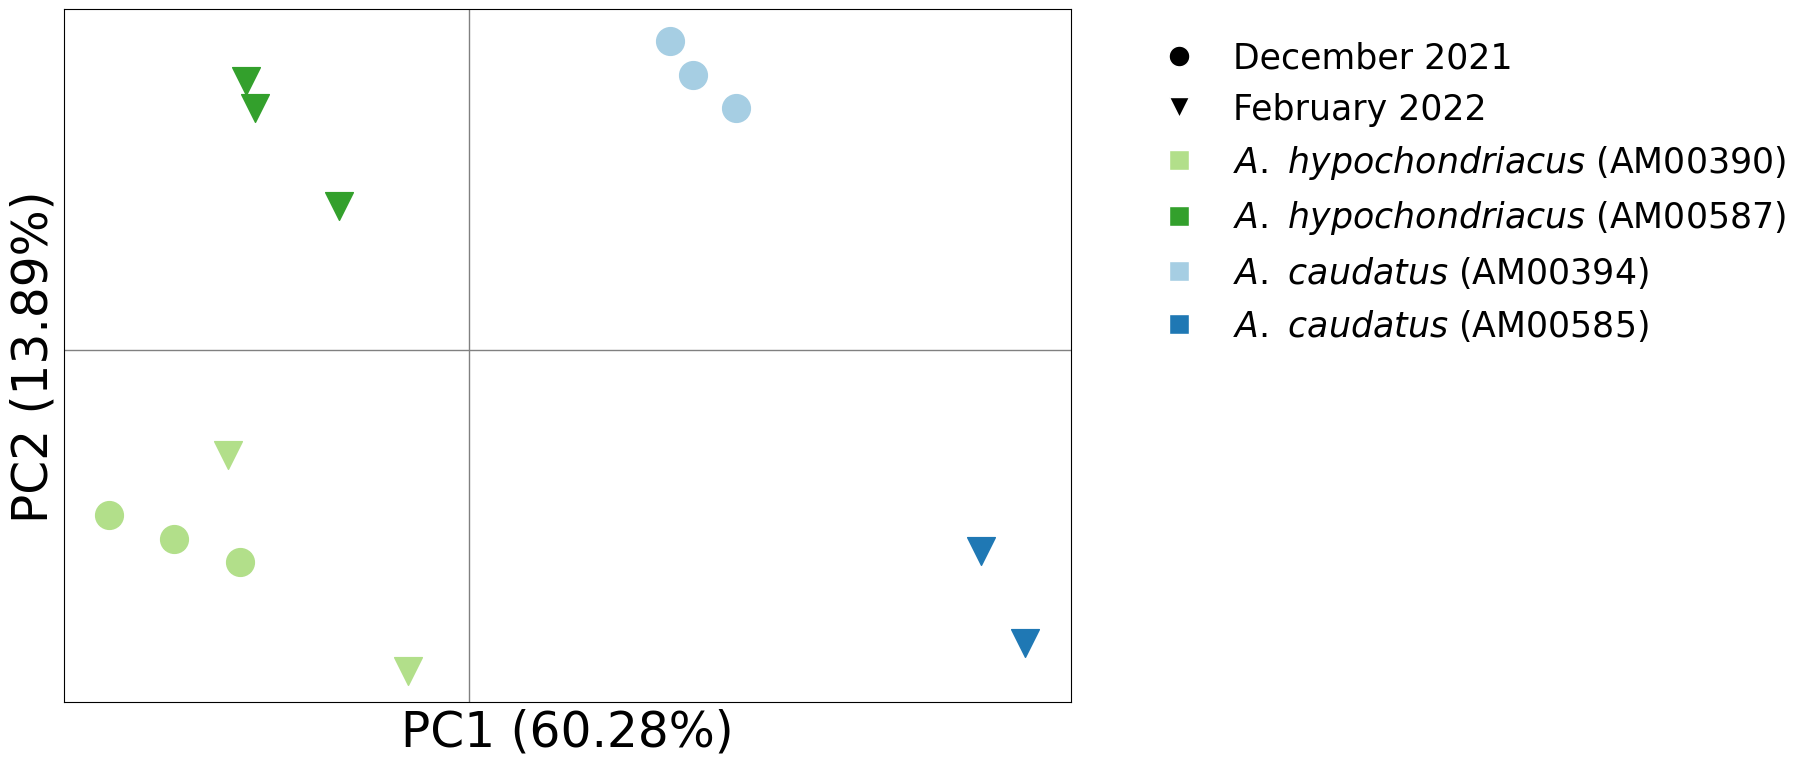

In [8]:
# final PCA-Plot
# Set font sizes
axis_label_font_size = 35 # changing size of the x/y axis label
legend_font_size = 25 #changing size of the legend 
marker_size = 400 #here you can change the size of the datapoints in the plot
legend_marker_size = 15  # increased size for legend markers

plt.figure(figsize=(13, 9))
colors = sns.color_palette("Paired")

# Scatter plot
for i, batch in enumerate(principal_df.index):
    subset = principal_df[principal_df.index == batch]
    species = subset.iloc[0].species
    accession = subset.iloc[0].accession
    color = colors[2 if species == 'hypochondriacus' and accession == 'AM00390' else 
                   3 if species == 'hypochondriacus' and accession == 'AM00587' else
                   0 if species == 'caudatus' and accession == 'AM00394' else
                   1]
    marker = 'o' if 'DEC' in batch else 'v'
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'], s=marker_size, color=color, marker=marker)

plt.xticks([]) # no x axis scaling, numerous description --> Tom said it is not neccesary for PCA plots
plt.yticks([]) # same here 

plt.xlabel('PC1 (%.2f%%)' % (pca.explained_variance_ratio_[0] * 100), fontsize=axis_label_font_size)
plt.ylabel('PC2 (%.2f%%)' % (pca.explained_variance_ratio_[1] * 100), fontsize=axis_label_font_size)

plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.grid(False)

# Legend creation
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='December 2021', markerfacecolor='black', markersize=legend_marker_size),
    Line2D([0], [0], marker='v', color='w', label='February 2022', markerfacecolor='black', markersize=legend_marker_size),
    Line2D([0], [0], marker='s', color='w', label=r'$\it{A.\ hypochondriacus}$' + ' (AM00390)', markerfacecolor=colors[2], markersize=legend_marker_size),
    Line2D([0], [0], marker='s', color='w', label=r'$\it{A.\ hypochondriacus}$' + ' (AM00587)', markerfacecolor=colors[3], markersize=legend_marker_size),
    Line2D([0], [0], marker='s', color='w', label=r'$\it{A.\ caudatus}$' + ' (AM00394)', markerfacecolor=colors[0], markersize=legend_marker_size),
    Line2D([0], [0], marker='s', color='w', label=r'$\it{A.\ caudatus}$' + ' (AM00585)', markerfacecolor=colors[1], markersize=legend_marker_size)
]

legend = plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=legend_font_size, frameon=False, handlelength=1.5)
plt.savefig(os.path.join(PLOTS_DIR_PATH,'PCA_2D.pdf'), bbox_inches="tight")
plt.savefig(os.path.join(PLOTS_DIR_PATH,'PCA_2D.png'), bbox_inches="tight")
plt.show()


In [ ]:
# Apply PCA
pca = PCA(n_components=3)  # Reduce dimensions to 3
principal_components = pca.fit_transform(top_n_df.T)
principal_df = pd.DataFrame(data = principal_components, columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
principal_df['batch'] = design.index
principal_df.set_index('batch', inplace=True)
principal_df['species'] = design.species
principal_df['accession'] = design.accession
principal_df

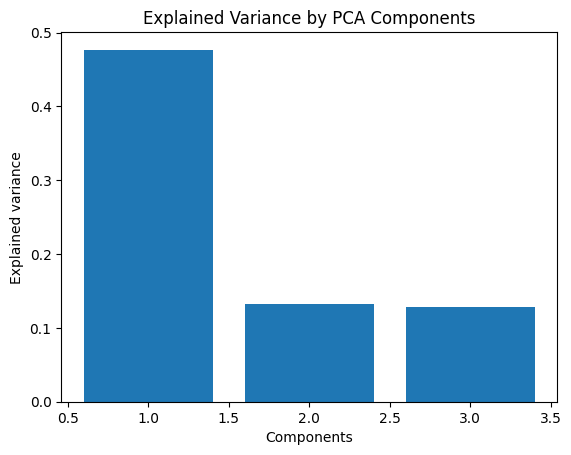

In [9]:
pca = PCA(n_components=3) # Reduce dimensions to 3
principal_components = pca.fit_transform(rlog.T)  # Ensure data is scaled

principal_df = pd.DataFrame(data = principal_components, columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
principal_df['batch'] = design.index
principal_df.set_index('batch', inplace=True)
principal_df['species'] = design.species
principal_df['accession'] = design.accession

plt.bar(range(1, 4), pca.explained_variance_ratio_)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.title('Explained Variance by PCA Components')
plt.savefig(os.path.join(PLOTS_DIR_PATH,'PCA_variance.pdf'))
plt.show()

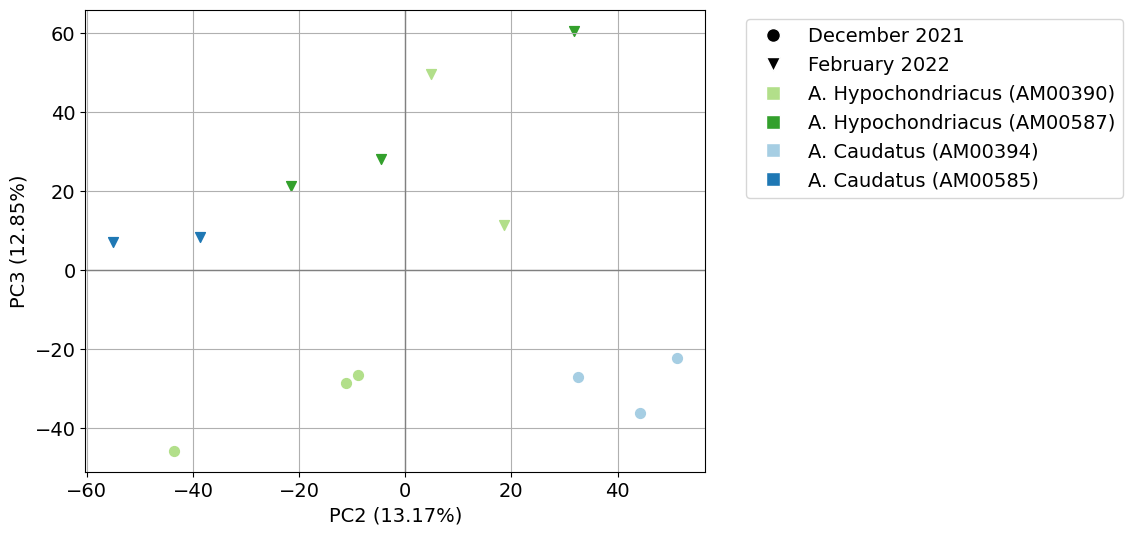

In [10]:
# Set global font size
plt.rcParams.update({'font.size': 14})  # You can adjust the size to your preference

plt.figure(figsize=(8, 6))
colors = sns.color_palette("Paired")

for i, batch in enumerate(principal_df.index):
    subset = principal_df[principal_df.index == batch]
    if subset.iloc[0].species == 'hypochondriacus':
        if subset.iloc[0].accession == 'AM00390':
            color = colors[2]
        elif subset.iloc[0].accession == 'AM00587':
            color = colors[3]
    elif subset.iloc[0].species == 'caudatus':
        if subset.iloc[0].accession == 'AM00394':
            color = colors[0]
        elif subset.iloc[0].accession == 'AM00585':
            color = colors[1]

    if 'DEC' in batch:
        marker = 'o'
    else:
        marker = 'v'
    
    plt.scatter(subset['Principal Component 2'], subset['Principal Component 3'], s=50, color=color, marker=marker, label=f"{subset.iloc[0].species} ({subset.iloc[0].accession}) {batch}")

plt.xlabel('PC2 (%.2f%%)' % (pca.explained_variance_ratio_[1] * 100))
plt.ylabel('PC3 (%.2f%%)' % (pca.explained_variance_ratio_[2] * 100))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.grid(True)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='December 2021', markerfacecolor='black', markersize=10),
    Line2D([0], [0], marker='v', color='w', label='February 2022', markerfacecolor='black', markersize=10),
    Line2D([0], [0], marker='s', color='w', label='A. Hypochondriacus (AM00390)', markerfacecolor=colors[2], markersize=10),
    Line2D([0], [0], marker='s', color='w', label='A. Hypochondriacus (AM00587)', markerfacecolor=colors[3], markersize=10),
    Line2D([0], [0], marker='s', color='w', label='A. Caudatus (AM00394)', markerfacecolor=colors[0], markersize=10),
    Line2D([0], [0], marker='s', color='w', label='A. Caudatus (AM00585)', markerfacecolor=colors[1], markersize=10)
]

plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig(os.path.join(PLOTS_DIR_PATH,'PCA_PC2_vs_PC3.pdf'), bbox_inches="tight")
plt.show()


## PCA in 3D

In [11]:
# Print the principal components
print("Principal components (Eigenvectors):\n", pca.components_)
len(pca.components_[0])

Principal components (Eigenvectors):
 [[-0.00011271 -0.00960163 -0.00070932 ... -0.00036285 -0.00578062
  -0.00113581]
 [-0.00216091  0.00033361 -0.00352239 ... -0.00060419 -0.00182
  -0.00617346]
 [-0.00082142 -0.00613029  0.00212655 ...  0.0055923   0.00454827
   0.00833819]]


19499

<Figure size 800x600 with 0 Axes>

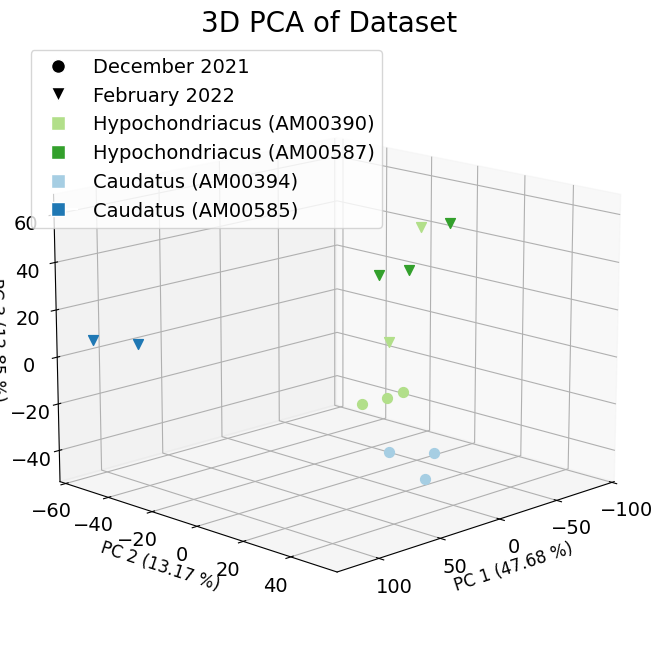

<Figure size 800x600 with 0 Axes>

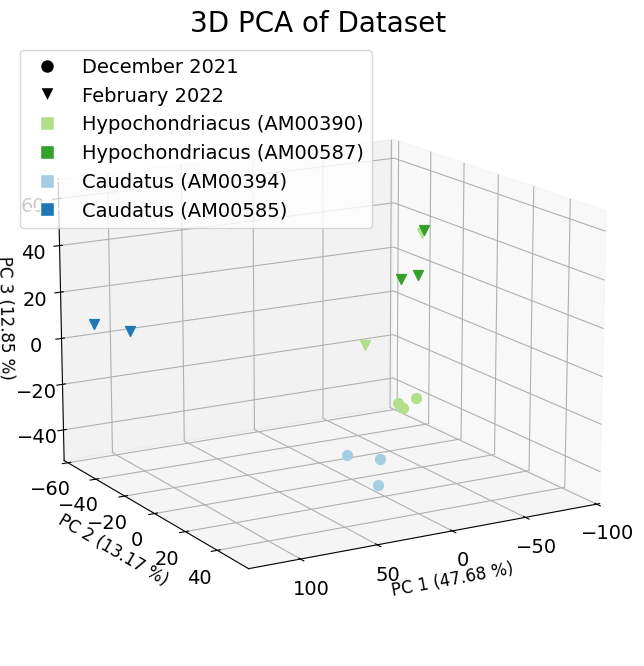

<Figure size 800x600 with 0 Axes>

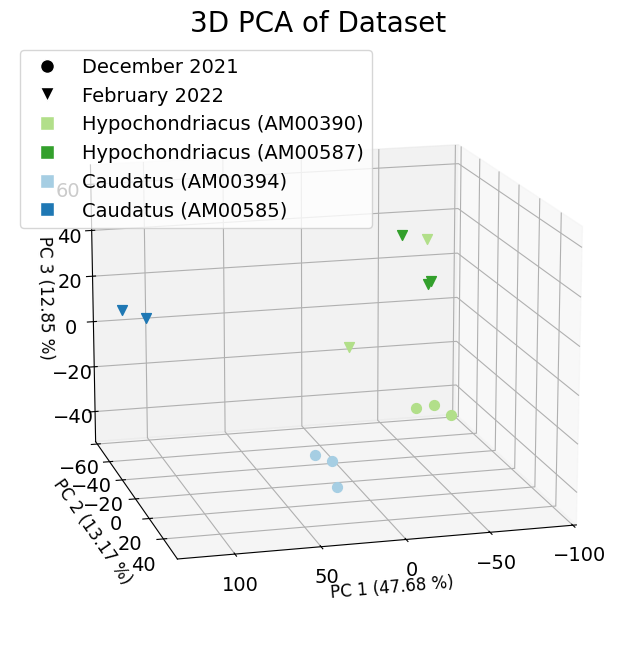

<Figure size 800x600 with 0 Axes>

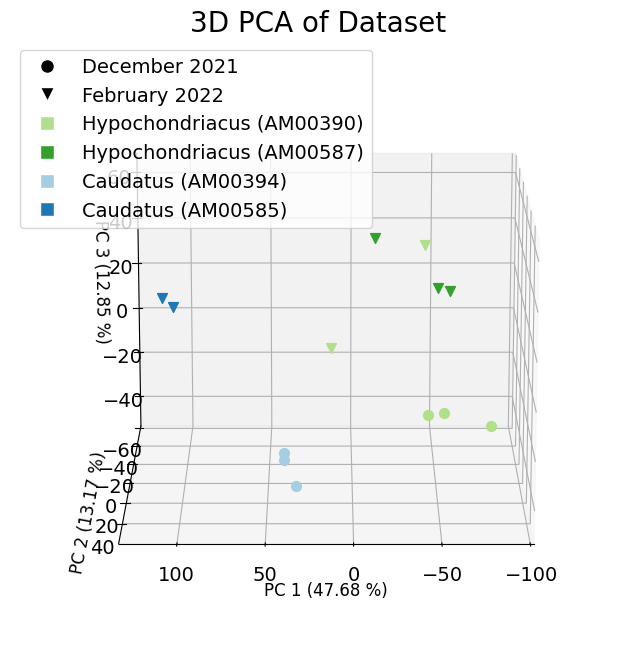

<Figure size 800x600 with 0 Axes>

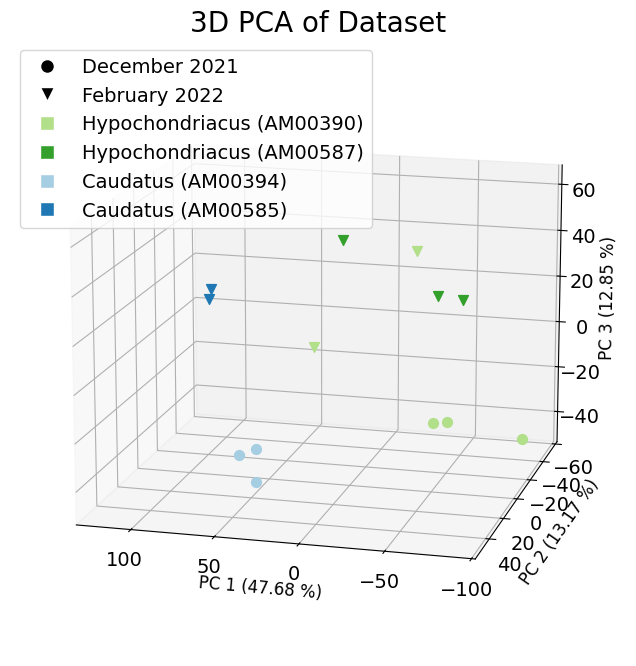

<Figure size 800x600 with 0 Axes>

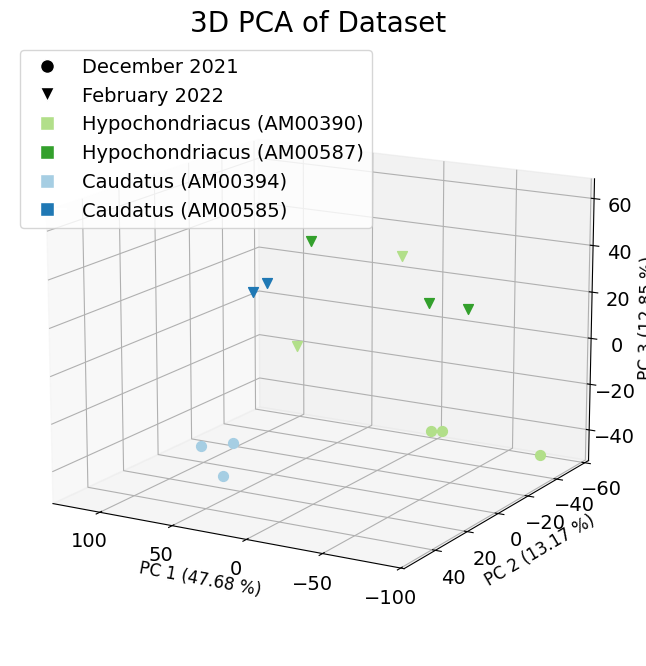

<Figure size 800x600 with 0 Axes>

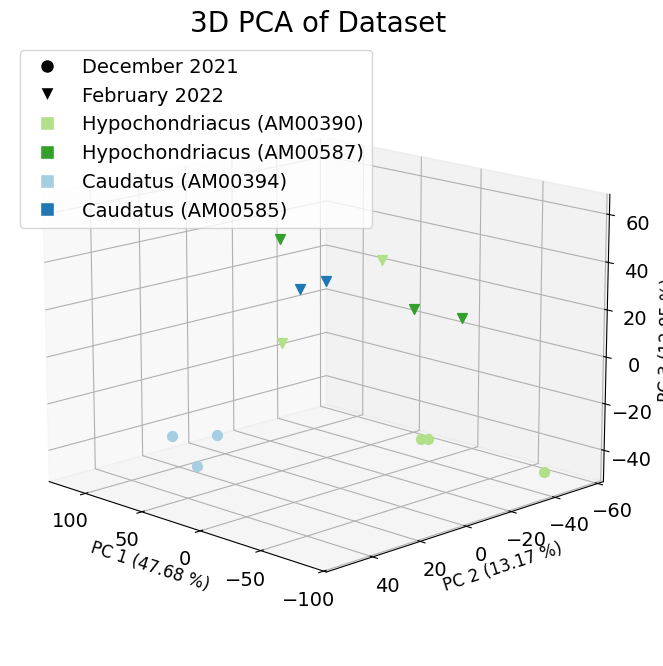

<Figure size 800x600 with 0 Axes>

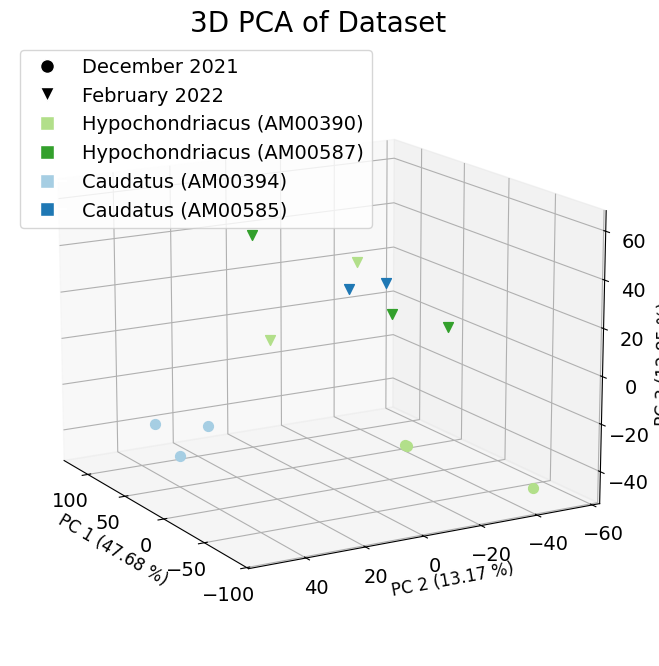

<Figure size 800x600 with 0 Axes>

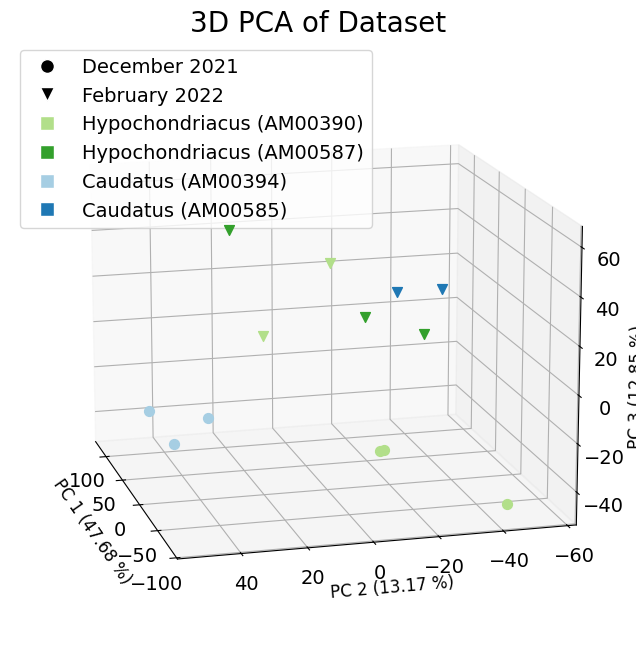

<Figure size 800x600 with 0 Axes>

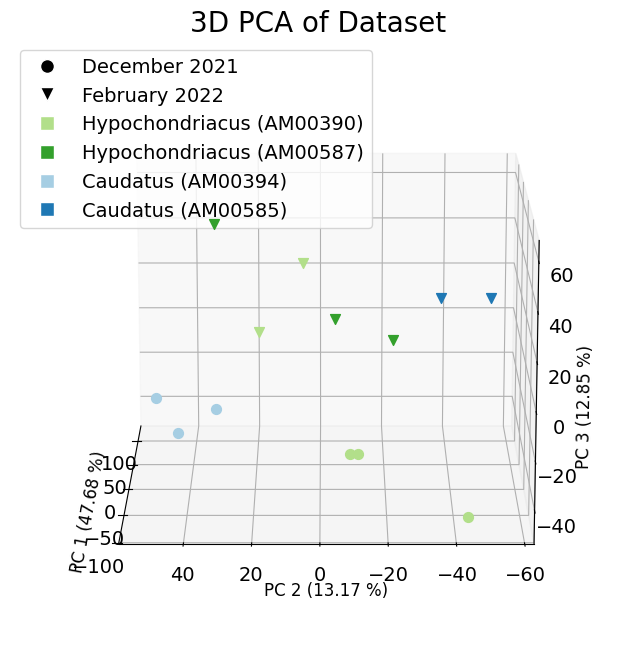

<Figure size 800x600 with 0 Axes>

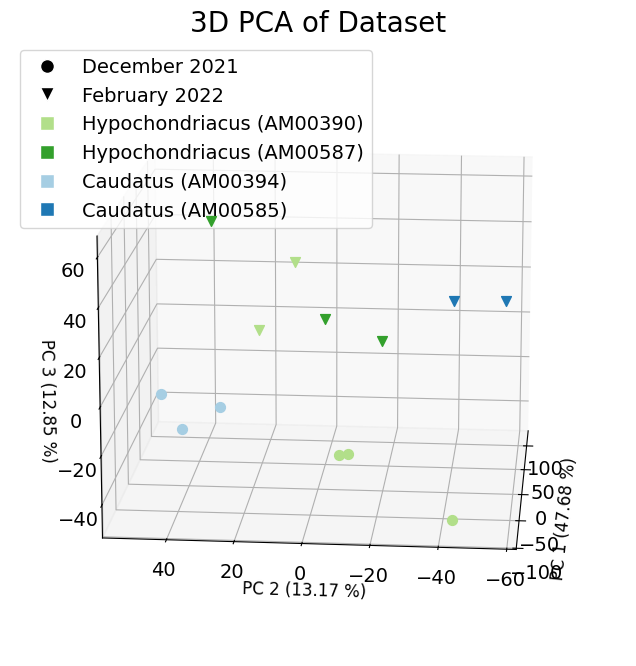

In [16]:
angles = [45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 185]
          
for angle in angles:

    # visualization of 3D PCA
    plt.figure(figsize=(8, 6))
    colors = sns.color_palette("Paired")

    # Create a single figure for 3D plotting
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    for i, batch in enumerate(principal_df.index):
        subset = principal_df[principal_df.index == batch]
        if subset.iloc[0].species == 'hypochondriacus':
            if subset.iloc[0].accession == 'AM00390':
                color=colors[2]
            else:
                color=colors[3]
        elif subset.iloc[0].accession == 'AM00394':
            color=colors[0]
        else:
            color=colors[1]
        if 'DEC' in batch:
                marker='o'
        else:
            marker='v'
        ax.scatter(subset['Principal Component 1'][0], subset['Principal Component 2'][0], subset['Principal Component 3'][0], s=50, color=color, label=batch, marker=marker)

    ax.set_xlabel(f'PC 1 ({round(pca.explained_variance_ratio_[0] * 100, 2)} %)', fontsize=12)
    ax.set_ylabel(f'PC 2 ({round(pca.explained_variance_ratio_[1] * 100, 2)} %)', fontsize=12)
    ax.set_zlabel(f'PC 3 ({round(pca.explained_variance_ratio_[2] * 100, 2)} %)', fontsize=12)
    ax.set_title('3D PCA of Dataset', fontsize=20)

    # Custom legend
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='December 2021', markerfacecolor='black', markersize=10),
        Line2D([0], [0], marker='v', color='w', label='February 2022', markerfacecolor='black', markersize=10),
        Line2D([0], [0], marker='s', color='w', label='Hypochondriacus (AM00390)', markerfacecolor=colors[2], markersize=10),
        Line2D([0], [0], marker='s', color='w', label='Hypochondriacus (AM00587)', markerfacecolor=colors[3], markersize=10),
        Line2D([0], [0], marker='s', color='w', label='Caudatus (AM00394)', markerfacecolor=colors[0], markersize=10),
        Line2D([0], [0], marker='s', color='w', label='Caudatus (AM00585)', markerfacecolor=colors[1], markersize=10)
        ]

    # Set the viewing angle
    ax.view_init(elev=15, azim=angle)

    # Place the legend
    legend = plt.legend(handles=legend_elements, bbox_to_anchor=(0, 1), loc='upper left')

    # Adjust the layout
    #plt.tight_layout()
    
    # Save the figure ensuring everything is included
    plt.savefig(os.path.join(PLOTS_DIR_PATH,f'PCA_3D_{angle}_top500.pdf'))
    plt.show()

In [ ]:
# visualization of 3D PCA
plt.figure(figsize=(8, 6))
colors = sns.color_palette("Paired")

# Create a single figure for 3D plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, batch in enumerate(principal_df.index):
    subset = principal_df[principal_df.index == batch]
    if subset.iloc[0].species == 'hypochondriacus':
        if subset.iloc[0].accession == 'AM00390':
            color=colors[0]
        else:
            color=colors[1]
    elif subset.iloc[0].accession == 'AM00394':
        color=colors[4]
    else:
        color=colors[5]
    if 'DEC' in batch:
            marker='o'
    else:
        marker='v'
    ax.scatter(subset['Principal Component 1'][0], subset['Principal Component 2'][0], subset['Principal Component 3'][0], s=50, color=color, label=batch, marker=marker)

ax.set_xlabel(f'PC 1 ({round(pca.explained_variance_ratio_[0] * 100, 2)} %)', fontsize=12)
ax.set_ylabel(f'PC 2 ({round(pca.explained_variance_ratio_[1] * 100, 2)} %)', fontsize=12)
ax.set_zlabel(f'PC 3 ({round(pca.explained_variance_ratio_[2] * 100, 2)} %)', fontsize=12)
ax.set_title('3D PCA of Dataset', fontsize=20)

# Custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='December 2021', markerfacecolor='black', markersize=10),
    Line2D([0], [0], marker='v', color='w', label='February 2022', markerfacecolor='black', markersize=10),
    Line2D([0], [0], marker='s', color='w', label='Hypochondriacus (AM00390)', markerfacecolor=colors[0], markersize=10),
    Line2D([0], [0], marker='s', color='w', label='Hypochondriacus (AM00587)', markerfacecolor=colors[1], markersize=10),
    Line2D([0], [0], marker='s', color='w', label='Caudatus (AM00394)', markerfacecolor=colors[4], markersize=10),
    Line2D([0], [0], marker='s', color='w', label='Caudatus (AM00585)', markerfacecolor=colors[5], markersize=10)
    ]

# Set the viewing angle
ax.view_init(elev=0, azim=90)

# Place the legend
legend = plt.legend(handles=legend_elements, bbox_to_anchor=(0, 1), loc='upper left')

# Adjust the layout
#plt.tight_layout()

# Save the figure ensuring everything is included
plt.savefig(f'{paths.PLOTS_DIR_PATH}PCA_3D_0_{90}_top500.pdf', bbox_extra_artists=[legend])
plt.show()
#break  # Remove this if you want to produce plots for all angles